In [2]:
import os  # operating system
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# print current working directory
os.getcwd()

'/Users/eranagmon/code/notebook_tests'

In [3]:
files = os.listdir('co-culture_data')
print(files)

['Bac_L species.csv', 'yeast_G candidum.csv', 'Bac_B aurantiacum.csv', 'Bac_s xylosus.csv', 'Bac_H alvei.csv', 'Yeast_Y lipolytica.csv', 'Yeast_D hassenii.csv', 'Bac_A arilaitensis.csv']


In [18]:
# put the data in one dataframe
all_dat = []
for i in range(len(files)):
    df1 = pd.read_csv('co-culture_data/' + files[i], index_col=0, header=0)
    splitnames = files[i].split('.')
    filename = splitnames[0]
    df1.rename(columns = {'logCFU': filename}, inplace=True)
    all_dat.append(df1)

df2 = pd.concat(all_dat, axis=1)
# df2

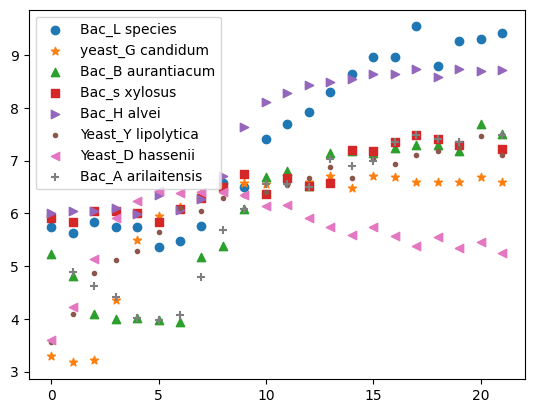

In [5]:
plt.figure()
markers = ["o", '*', '^', 's', '>', '.', '<', '+', 'v']
for i in range(len(df2.columns)):
    mi=markers[i]
    plt.scatter(df2.index, df2[f'{df2.columns[i]}'], alpha=1, marker=mi, label=f'{df2.columns[i]}')

plt.legend()
plt.show()

In [11]:
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# help(curve_fit)

In [40]:
last = len(list)-1
list[last]

9

In [23]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [49]:
import numpy as np
tt=np.random.rand(4,5)
tt

array([[0.84926394, 0.96407074, 0.74887297, 0.02222825, 0.99119715],
       [0.61168084, 0.91191911, 0.14068488, 0.60879186, 0.72417227],
       [0.96572466, 0.93696782, 0.61450405, 0.40376492, 0.51649374],
       [0.41631088, 0.98811253, 0.23225731, 0.49970523, 0.30316846]])

In [50]:
tt.shape

(4, 5)

In [ ]:
species_names = ['Bac_L species', 'Bac_H alvei']  # TODO -- can get names from the dataframe to make this more scalable

In [53]:
NUM_SPECIES = len(species_names)

def generalized_lotka_volterra(t, *params):
    growth_rates = np.array(params[:NUM_SPECIES])
    interactions = np.array(params[NUM_SPECIES:]).reshape((NUM_SPECIES, NUM_SPECIES))

    def model(populations, t):
        dX = []
        for i, x in enumerate(populations):
            dx = growth_rates[i]*x
            
            interaction = 0
            for j in range(NUM_SPECIES):
                interaction += interactions[i][j]*x*populations[j]
    
            dx += interaction
            dX.append(dx)
        return dX

    solution = odeint(model, initial_populations, t)
    return solution.flatten()

In [65]:
# get the data out of the dataframe
time_data = np.array(df2.index)

# get population data
population_data = np.zeros((len(time_data), len(species_names)))
for i, species in enumerate(species_names):
    species_pop = df2[species].to_numpy()
    population_data[:,i] = species_pop

# print(f'TIMES: {time_data}')
# population_data

In [67]:
initial_populations = [6, 6]  # the inital state

guess = [1 for _ in range(NUM_SPECIES)] + [0]*(NUM_SPECIES*NUM_SPECIES)
guess

[1, 1, 0, 0, 0, 0]

In [68]:
population_data_flattened = population_data.flatten()

params, cov = curve_fit(generalized_lotka_volterra, time_data, population_data_flattened, p0=guess)

/Users/eranagmon/code/notebook_tests/venv/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/eranagmon/code/notebook_tests/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [69]:
# print the parameters
print(f"Fitted parameters: {params}")

Fitted parameters: [ 2.21693210e-02  2.11811923e-02 -5.25773481e-21  5.30594738e-61
  2.06831009e-56 -2.06825677e-56]


In [81]:
fitted_results = generalized_lotka_volterra(time_data, *params).reshape(len(time_data),NUM_SPECIES)
fitted_results

array([[6.        , 6.        ],
       [6.13450129, 6.12844261],
       [6.27201768, 6.25963481],
       [6.41261681, 6.39363549],
       [6.55636771, 6.53050472],
       [6.70334105, 6.67030392],
       [6.85360908, 6.81309582],
       [7.00724566, 6.95894448],
       [7.16432629, 7.10791535],
       [7.32492818, 7.26007524],
       [7.48913028, 7.41549246],
       [7.6570133 , 7.57423672],
       [7.82865971, 7.73637922],
       [8.00415387, 7.9019927 ],
       [8.18358205, 8.07115148],
       [8.36703247, 8.24393146],
       [8.55459529, 8.42041018],
       [8.74636268, 8.60066679],
       [8.9424289 , 8.78478218],
       [9.14289032, 8.97283894],
       [9.34784546, 9.16492146],
       [9.55739505, 9.36111591]])

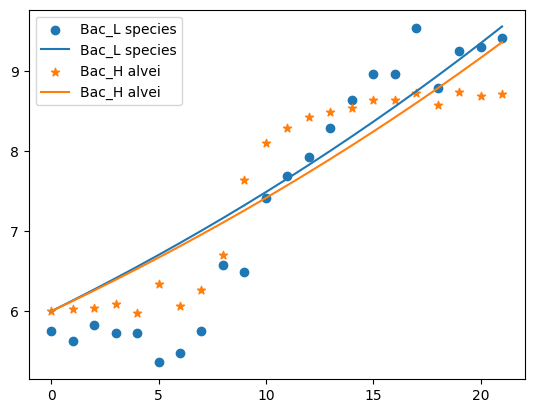

In [84]:
plt.figure()

for i in range(NUM_SPECIES):

    plt.scatter(time_data, population_data[:, i], marker=markers[i], label=species_names[i])

    plt.plot(time_data, fitted_results[:,i], label=species_names[i])

plt.legend()
plt.show()

In [13]:
# reformat the data into numpy arrays so that curve_fit
time_data = np.array(species_data[species_names[0]]['times'])

population_data = np.zeros((len(time_data), len(species_names)))
for i, species in enumerate(species_names):
    population_data[:, i] = species_data[species]['population']

In [14]:
initial_populations = [6, 6]  # the inital state

guess = [1 for _ in range(NUM_SPECIES)] + [0]*(NUM_SPECIES*NUM_SPECIES)

In [15]:
guess

[1, 1, 0, 0, 0, 0]

In [16]:
population_data_flattened = population_data.flatten()

params, cov = curve_fit(generalized_lotka_volterra, time_data, population_data_flattened, p0=guess)

/Users/eranagmon/code/notebook_tests/venv/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/eranagmon/code/notebook_tests/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [17]:
# Print fitted parameters
print("Fitted parameters:", params)

Fitted parameters: [ 2.21693210e-02  2.11811923e-02 -5.25773481e-21  5.30594738e-61
  2.06831009e-56 -2.06825677e-56]


In [22]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional